In [1]:
import pandas as pd
import functions as f
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Inistialize data ###

# balance sheet Microsoft
bs_annual_MSFT = pd.read_csv("data/bs_annual_MSFT.csv")
bs_annual_MSFT = f.second_clean(bs_annual_MSFT)

# cashflow Microsoft
cf_annual_MSFT = pd.read_csv("data/cf_annual_MSFT.csv")
cf_annual_MSFT = f.second_clean(cf_annual_MSFT)

# income statement Microsoft
pnl_annual_MSFT = pd.read_csv("data/pnl_annual_MSFT.csv")
pnl_annual_MSFT = f.second_clean(pnl_annual_MSFT)

In [3]:
# Calculating KPIs
pnl_annual_MSFT = f.calculating_kpi_pnl(pnl_annual_MSFT)
pnl_annual_MSFT["insights"] = pnl_annual_MSFT.apply(f.generate_automated_insights,axis=1)

In [4]:
# Creating a previous year file
pnl_annual_MSFT_prev = f.create_prev_year(pnl_annual_MSFT)
bs_annual_MSFT_prev = f.create_prev_year(bs_annual_MSFT)
cf_annual_MSFT_prev = f.create_prev_year(cf_annual_MSFT)

In [5]:
# Creating concatenated files
pnl_concat_MSFT = pd.concat([pnl_annual_MSFT,pnl_annual_MSFT_prev],axis=1)
bs_concat_MSFT = pd.concat([bs_annual_MSFT,bs_annual_MSFT_prev],axis=1)
cf_concat_MSFT = pd.concat([cf_annual_MSFT,cf_annual_MSFT_prev],axis=1)

In [6]:
pnl_concat_MSFT.columns

Index(['fiscalDateEnding', 'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome',
       'grossMargin', 'operatingMargin', 'netProfitMargin',
       'interestCoverageRatio', 'insights', 'grossProfit_prev',
       'totalRevenue_prev', 'costOfRevenue_prev',
       'costofGoodsAndServicesSold_prev', 'operatingIncome_prev',
       'sellingGeneralAndAdministrative_prev', 'researchAndDevelopment_prev',
       'operatingExpenses_prev', 'investmentIncomeNet_prev',
       'netInterest

In [7]:
# Calculating Generating Insights for concatenated files
pnl_concat_MSFT["Previous year insights"] = pnl_concat_MSFT.apply(f.generate_insights_pnl,axis=1)

In [8]:
# Creating column for patterns
pnl_concat_MSFT["year_comparison_insight"] = pnl_concat_MSFT.apply(f.yeah_comparison_pnl,axis=1)
pnl_annual_MSFT["fiscalDateEnding"] = pnl_concat_MSFT["fiscalDateEnding"].fillna(0).astype(int)

In [13]:
cell_content = pnl_concat_MSFT.at[3,"insights"]
print(F"Insights : {cell_content}")
cell_content = pnl_concat_MSFT.at[3,"Previous year insights"]
print(F"Prev.Year Insights : {cell_content}")
cell_content = pnl_concat_MSFT.at[3,"year_comparison_insight"]
print(F"Patterns : {cell_content}")

Insights : Net Profit Margin was an impressive 36.92447690675923%, indicating strong overall profitability. The Interest Coverage Ratio was healthy at 31.307757885763, showing that the company has no issues covering its interest obligations.
Prev.Year Insights : In 2021.0, the Gross Margin was 69.81968951885064% (previous year: 67.0%), which changed by 4.21% compared to the previous year. The Operating Margin was 42.134316845048694% (previous year: 34.0%), which changed by 23.92% compared to the previous year. The Net Profit Margin was 36.92447690675923% (previous year: 31.0%), which changed by 19.11% compared to the previous year. The Interest Coverage Ratio was 31.307757885763 (previous year: 17.0), which changed by 84.16% compared to the previous year. Total Revenue was 165936000000.0 (previous year: 123495000000.0), which changed by 34.37% compared to the previous year. Net Income was 61271000000.0 (previous year: 39240000000.0), which changed by 56.14% compared to the previous yea

In [11]:
pnl_concat_MSFT[pnl_concat_MSFT["fiscalDateEnding"] == 2021][["grossMargin","grossMargin_prev"]]

,grossMargin,grossMargin_prev
3,69.81969,67.0


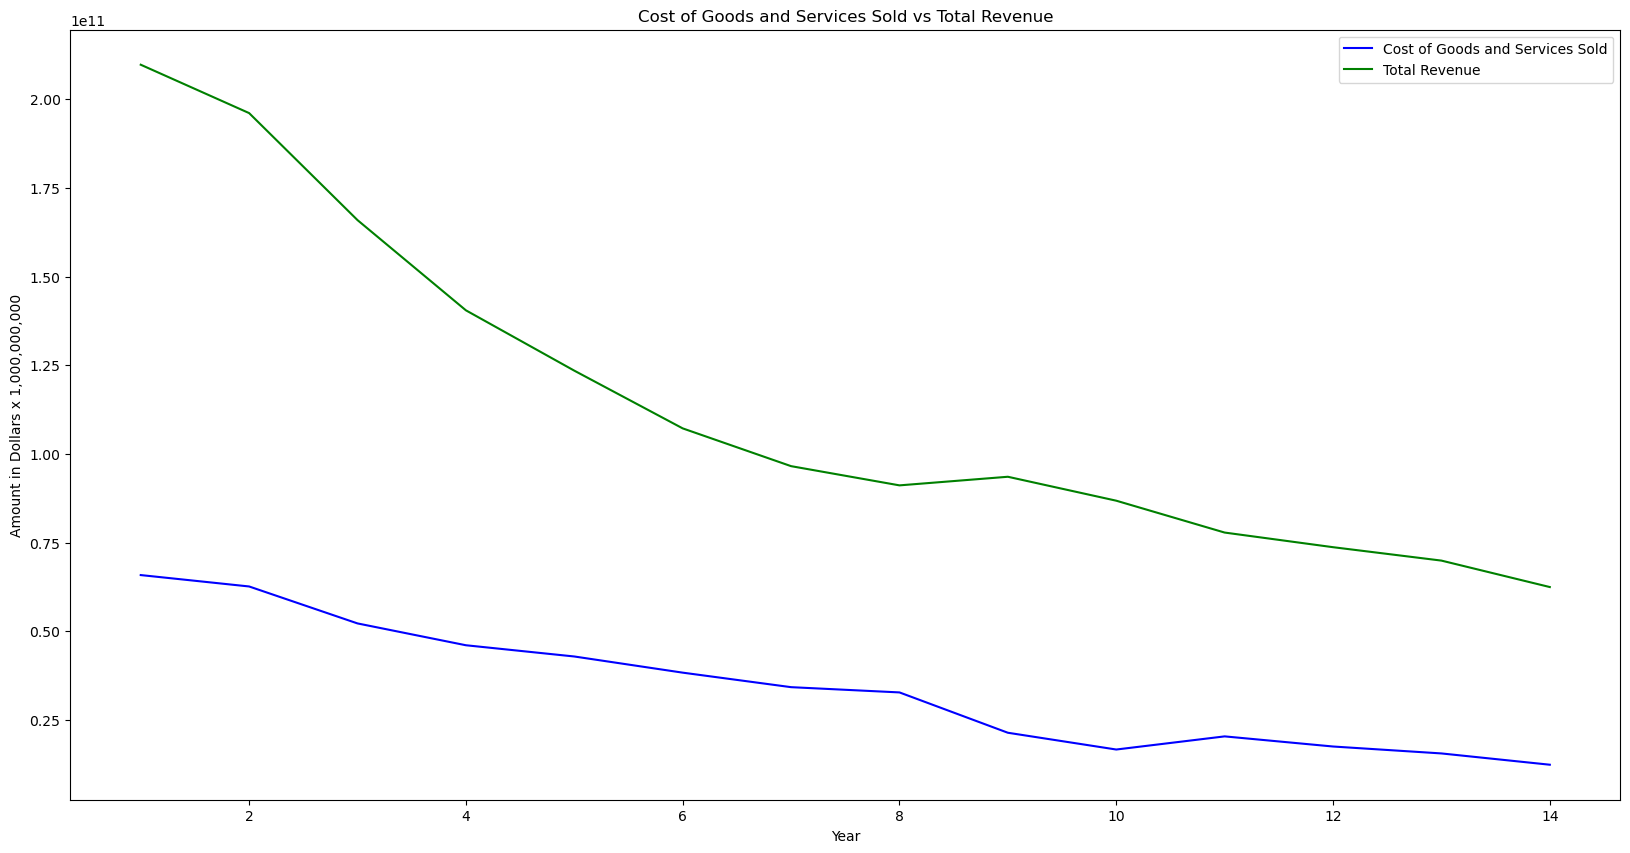

In [13]:
# Create a figure and axis object to plot both lines on the same graph
fig, ax = plt.subplots(figsize=(20, 10))

# Plot COGS
pnl_annual_MSFT["costofGoodsAndServicesSold"].sort_index(ascending=True).plot(
    kind="line",
    ax=ax,
    label="Cost of Goods and Services Sold",
    color='blue'
)

# Plot Total Revenue
pnl_annual_MSFT["totalRevenue"].sort_index(ascending=True).plot(
    kind="line",
    ax=ax,
    label="Total Revenue",
    color='green'
)

# Add titles and labels
ax.set_title("Cost of Goods and Services Sold vs Total Revenue")
ax.set_xlabel("Year")
ax.set_ylabel("Amount in Dollars x 1,000,000,000")
ax.legend()

# Show the plot
plt.show()

<Axes: title={'center': 'totalAssets'}, xlabel='Year', ylabel='Amount in Dollars x 1000000000'>

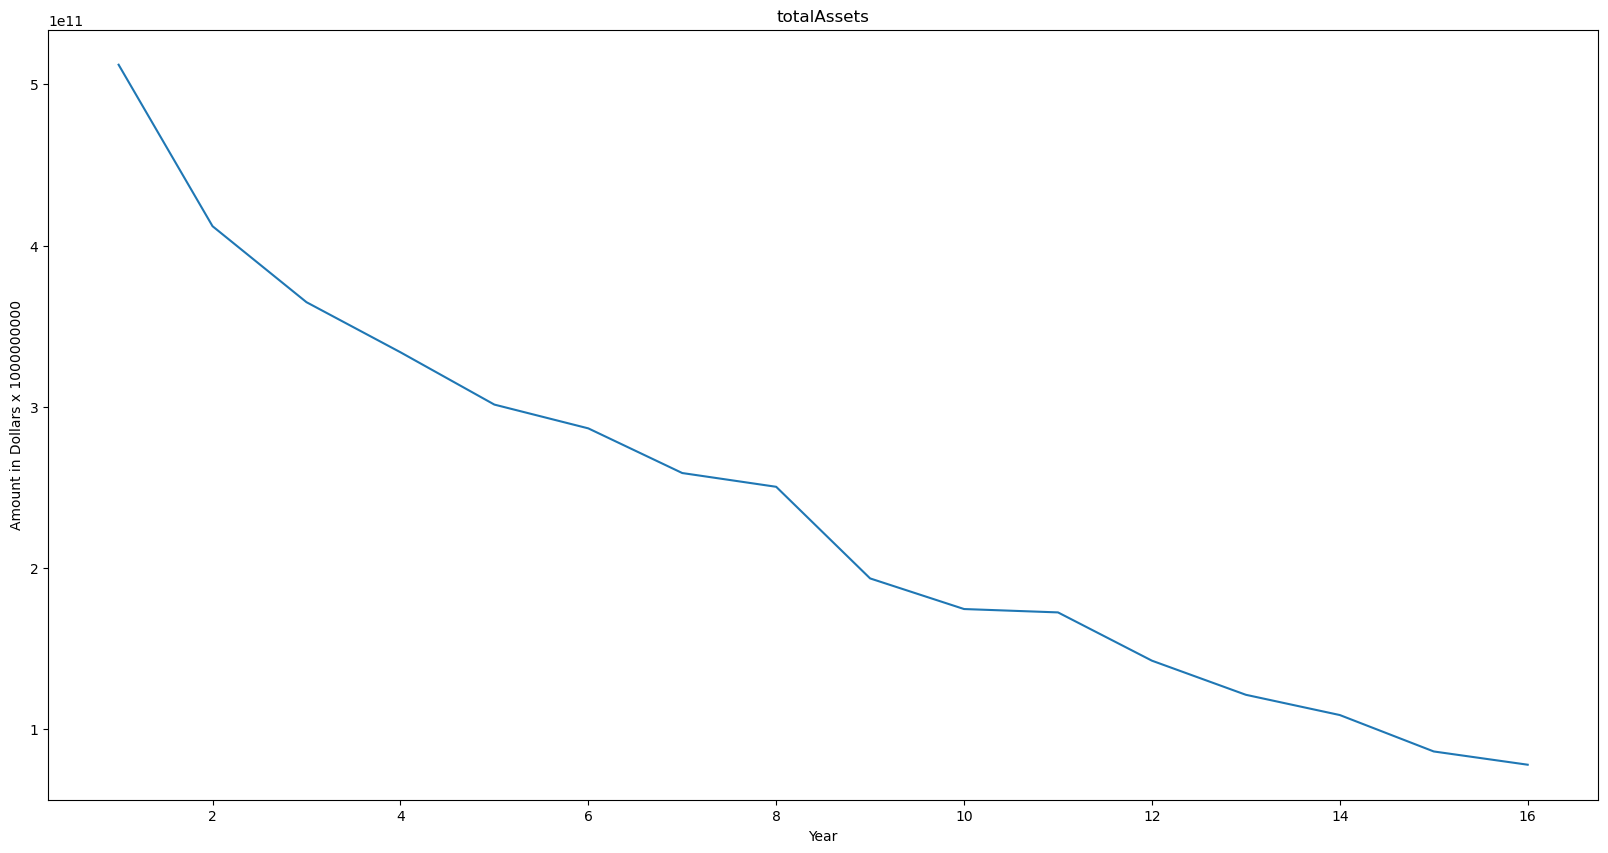

In [14]:
bs_annual_MSFT["totalAssets"].sort_index(ascending=True).plot(kind="line", title="totalAssets", figsize=(20, 10), xlabel="Year",ylabel="Amount in Dollars x 1000000000") 